array([[<Axes: xlabel='G3', ylabel='G3'>,
        <Axes: xlabel='studytime', ylabel='G3'>,
        <Axes: xlabel='Fedu', ylabel='G3'>,
        <Axes: xlabel='failures', ylabel='G3'>,
        <Axes: xlabel='Dalc', ylabel='G3'>,
        <Axes: xlabel='Walc', ylabel='G3'>],
       [<Axes: xlabel='G3', ylabel='studytime'>,
        <Axes: xlabel='studytime', ylabel='studytime'>,
        <Axes: xlabel='Fedu', ylabel='studytime'>,
        <Axes: xlabel='failures', ylabel='studytime'>,
        <Axes: xlabel='Dalc', ylabel='studytime'>,
        <Axes: xlabel='Walc', ylabel='studytime'>],
       [<Axes: xlabel='G3', ylabel='Fedu'>,
        <Axes: xlabel='studytime', ylabel='Fedu'>,
        <Axes: xlabel='Fedu', ylabel='Fedu'>,
        <Axes: xlabel='failures', ylabel='Fedu'>,
        <Axes: xlabel='Dalc', ylabel='Fedu'>,
        <Axes: xlabel='Walc', ylabel='Fedu'>],
       [<Axes: xlabel='G3', ylabel='failures'>,
        <Axes: xlabel='studytime', ylabel='failures'>,
        <Axes: xlabel='Fedu

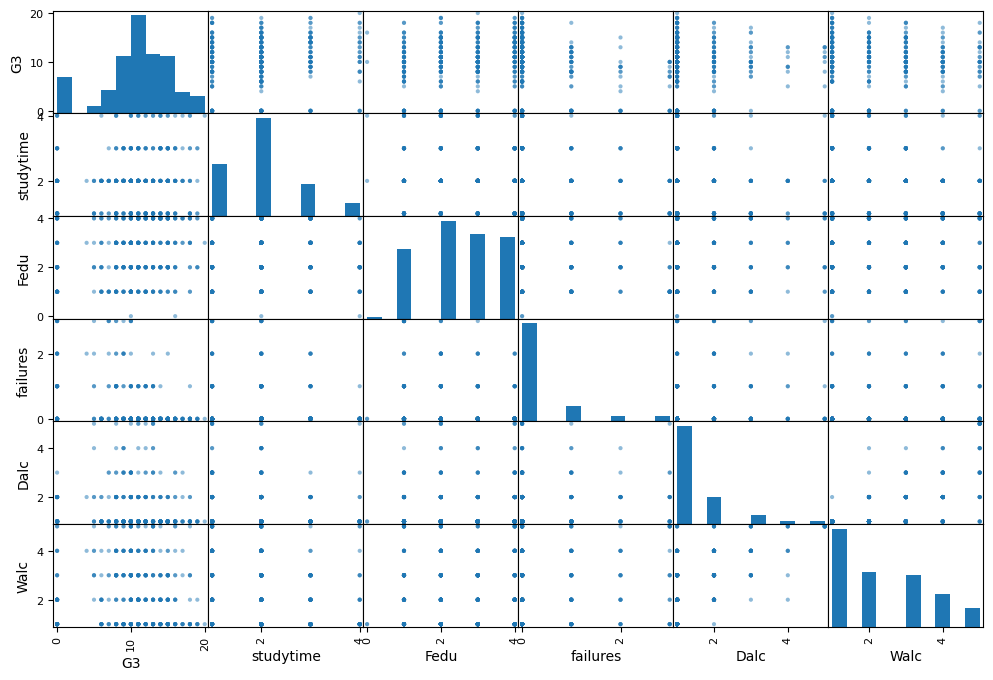

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student/student-mat.csv', sep=';')

attributes = ['G3', 'studytime', 'Fedu', 'failures', 'Dalc', 'Walc']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

C:\Users\matei\AppData\Local\Temp\ipykernel_1604\3602275638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

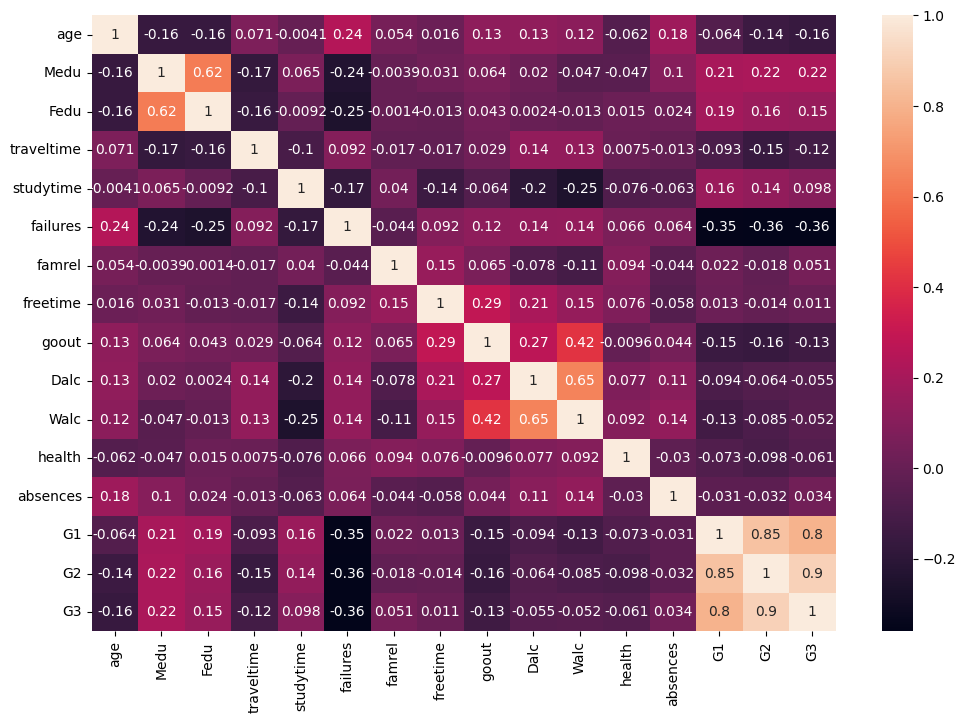

In [97]:
corr_matrix = df.corr()
corr_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)


array([[<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'Dalc'}>],
       [<Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>, <Axes: title={'center': 'G1'}>],
       [<Axes: title={'center': 'G2'}>, <Axes: title={'center': 'G3'}>,
        <Axes: >]], dtype=object)

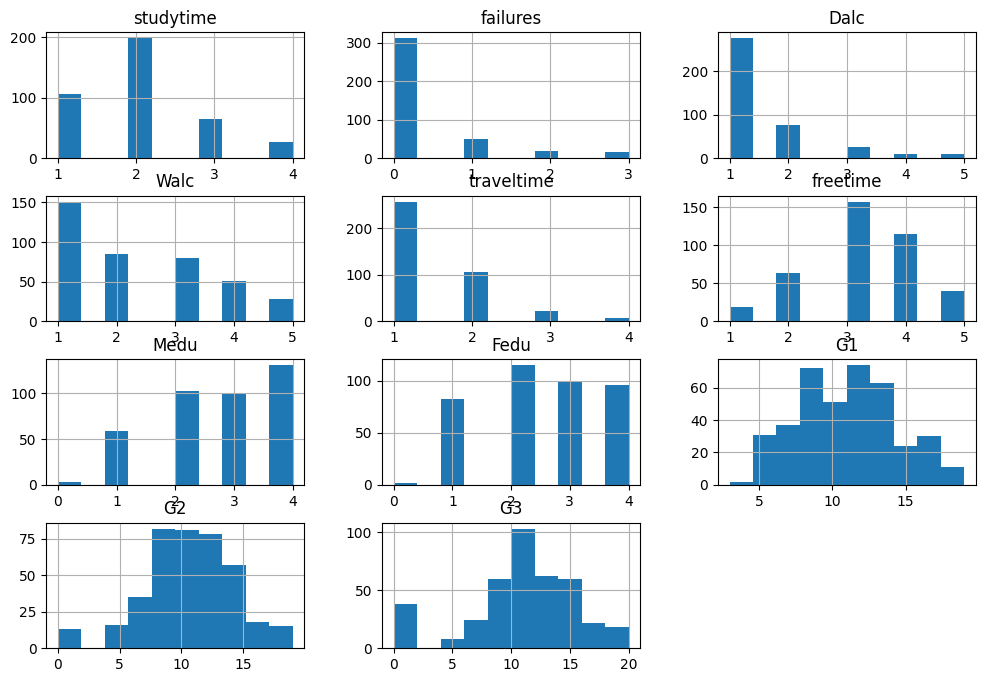

In [98]:
corr_matrix['G3'].sort_values(ascending=False)

# features = ['Medu', 'Fedu', 'studytime', 'famrel']

features = ['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime',  'Medu', 'Fedu', 
                   'sex', 'school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                   'higher', 'internet', 'G1', 'G2', 'G3']

df_reduced = df[features].copy()
df_reduced.hist(figsize=(12, 8))

# df_reduced['G']=(df_reduced['G1']+df_reduced['G2']+df_reduced['G3'])/3
# df_reduced.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features_cat = ['sex', 'school', 'address', 'Mjob', 'Fjob',
                'reason', 'schoolsup', 'guardian', 'higher', 'internet']

df_reduced_cat = pd.get_dummies(df_reduced, columns=features_cat)

X = np.array(df_reduced_cat.drop(['G3'], axis=1))
y = np.array(df_reduced_cat['G3'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_train, y_train)

print(sgd_reg.score(X_test, y_test))

0.7925877734420403
